# Jupyter Notebooks (Python Version)
We're going to use Jupyter for this class. This is the **Python version** of the introductory notebook.

This environment has some pros and some cons:
* In my view Jupyter is a nice environment for documenting applications/projects, at the stage where you're already pretty certain about the objects you're manipulating.
* The ability to run things on demand, and to play with a cell until you're happy is very useful
* Being able to directly comment what you're doing in Markdown is also great
* Jupyter can also create much nicer output of what you've done

Jupyter is often used to provide formatted documentation of a data science project, particularly as it can be used to export the output to HTML for the web.

It is also a common interface on cloud platforms:
* [Amazon Sagemaker](https://aws.amazon.com/sagemaker/)
* [Azure ML Studio](https://studio.azureml.net/)
* [Google Colab](https://colab.research.google.com/)
* [Posit Cloud](https://posit.cloud/)

## Python Setup

For Python data science work, we'll use several core libraries:
* **pandas** - Data manipulation (similar to R's tidyverse/dplyr)
* **numpy** - Numerical computing
* **matplotlib** - Plotting (similar to base R graphics)
* **seaborn** - Statistical visualization (similar to ggplot2)
* **statsmodels** - Statistical modeling (similar to R's lm(), glm(), etc.)

You can install these via:
```bash
pip install pandas numpy matplotlib seaborn statsmodels
```

## Using Jupyter

You can start jupyter from a terminal command:
* `jupyter lab` - More customizable tab-based interface
* `jupyter notebook` - Standard notebook interface

Jupyter notebooks are broken up into cells:
* While in a cell you can type whatever you want, and hit **Shift+Enter** to run the cell
* Hitting the **[ESC]** key will move you to Command mode where you can manipulate cells

## Jupyter Command Mode
When in command mode there are a number of hot keys to do things quickly ([Cheatsheet](https://www.edureka.co/blog/wp-content/uploads/2018/10/Jupyter_Notebook_CheatSheet_Edureka.pdf)):
* **a** - adds a cell above the current one
* **b** - adds a cell below the current one
* **y** - makes the current cell a code cell
* **m** - makes the current cell a markdown cell
* **dd** - deletes the current cell (press d twice)

## Jupyter Markdown Cells
In markdown cells you can enter simple formatted comments to surround your code:

# Heading 1
## Heading 2
* Bullet list 1
* Bullet list 2

---

| head1 | head2 |
| --- | --- |
| entry1 | entry2 |
| entry3 | entry4 |

[Link](https://pitt.edu)

## Jupyter Code Cells
Code cells contain Python code. Anything you type in the cell and run is the same as if you ran it in a Python interpreter.

In [1]:
# Import core libraries (equivalent to R's library(tidyverse))
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Set up nicer plot defaults
plt.rcParams['figure.figsize'] = (10, 6)
sns.set_style('whitegrid')

In [2]:
# Check current working directory
import os
os.getcwd()

'/Users/taylorjweidman/Library/CloudStorage/GoogleDrive-plusdirt@gmail.com/Other computers/Macbook Air/PROJECTS/tayweid.github.io/econ-2823/classes/notebooks'

In [3]:
# Load the MLB dataset
# In pandas, we use pd.read_csv()
MLB16_18 = pd.read_csv("MLB.csv")

## Output
Just like R, if you run something without an assignment, the system will provide you with the output.

In [5]:
# View first few rows
MLB16_18.head()

,Rk,Name,Age,Tm,Lg,AB,BA,Year,Agesqrd
0,30,Brett Anderson*,28,LAD,NL,3,0.0,2016,784
1,159,Dylan Bundy#,23,BAL,AL,3,0.0,2016,529
2,363,Matt Duffy,27,HOU,AL,3,0.0,2016,729
3,478,Gonzalez Germen,28,COL,NL,3,0.0,2016,784
4,513,Terrance Gore,25,KCR,AL,3,0.0,2016,625


In [6]:
# Column names
MLB16_18.columns.tolist()

['Rk', 'Name', 'Age', 'Tm', 'Lg', 'AB', 'BA', 'Year', 'Agesqrd']

In [7]:
# Data types and basic info
MLB16_18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2895 entries, 0 to 2894
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Rk       2895 non-null   int64  
 1   Name     2895 non-null   object 
 2   Age      2895 non-null   int64  
 3   Tm       2895 non-null   object 
 4   Lg       2895 non-null   object 
 5   AB       2895 non-null   int64  
 6   BA       2895 non-null   float64
 7   Year     2895 non-null   int64  
 8   Agesqrd  2895 non-null   int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 203.7+ KB


In [8]:
# Summary statistics
MLB16_18.describe()

,Rk,Age,AB,BA,Year,Agesqrd
count,2895.000000,2895.000000,2895.000000,2895.000000,2895.000000,2895.000000
mean,744.337824,28.034197,185.782729,0.204859,2017.001382,800.597927
std,428.184190,3.832337,193.102538,0.094858,0.817905,224.279404
min,1.000000,19.000000,3.000000,0.000000,2016.000000,361.000000
25%,378.000000,25.000000,24.000000,0.163000,2016.000000,625.000000
50%,751.000000,28.000000,100.000000,0.230000,2017.000000,784.000000
75%,1110.500000,31.000000,330.000000,0.265000,2018.000000,961.000000
max,1537.000000,45.000000,672.000000,0.667000,2018.000000,2025.000000


## Linear Regression

In Python, we use `statsmodels` for linear regression. The main differences from R:
* R: `lm(BA ~ Age + Agesqrd, data=MLB16.18)`
* Python: Need to explicitly add constant and specify X and y separately

In [12]:
# Linear regression
# R:  BA.reg1 <- lm(data=MLB16.18, BA ~ Age + Agesqrd)

# In Python with statsmodels:
# 1. Define X (predictor variables) and y (outcome variable)
X = MLB16_18[['Age', 'Agesqrd']]
X = sm.add_constant(X)  # Add intercept
y = MLB16_18['BA']

# 2. Fit the model
BA_reg1 = sm.OLS(y, X).fit()

# 3. View coefficients
BA_reg1.params

const      0.046644
Age        0.009892
Agesqrd   -0.000149
dtype: float64

In [15]:
# Full model summary
print(BA_reg1.summary())

                            OLS Regression Results                            
Dep. Variable:                     BA   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     4.991
Date:                Wed, 04 Feb 2026   Prob (F-statistic):            0.00686
Time:                        14:12:38   Log-Likelihood:                 2716.5
No. Observations:                2895   AIC:                            -5427.
Df Residuals:                    2892   BIC:                            -5409.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0466      0.074      0.632      0.5

## Plotting

For plotting, we have two main options:
* **matplotlib** - More like base R graphics
* **seaborn** - More like ggplot2, with nicer defaults

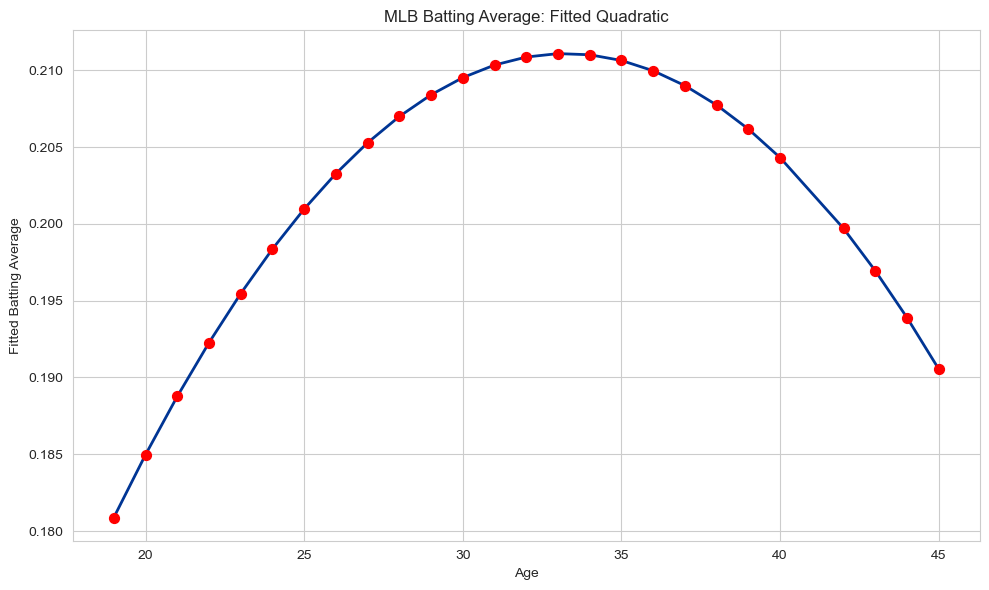

In [16]:
# Plotting fitted values

fig, ax = plt.subplots(figsize=(10, 6))

# Get unique ages and their fitted values
plot_data = MLB16_18.copy()
plot_data['fitted'] = BA_reg1.fittedvalues

# Sort by Age for line plot
plot_data_sorted = plot_data.groupby('Age')['fitted'].mean().reset_index()

# Plot line
ax.plot(plot_data_sorted['Age'], plot_data_sorted['fitted'], 
        linewidth=2, color='#003594', label='Fitted')

# Plot points
ax.scatter(plot_data_sorted['Age'], plot_data_sorted['fitted'], 
           s=50, color='red', zorder=5)

ax.set_xlabel('Age')
ax.set_ylabel('Fitted Batting Average')
ax.set_title('MLB Batting Average: Fitted Quadratic')
plt.tight_layout()
plt.show()

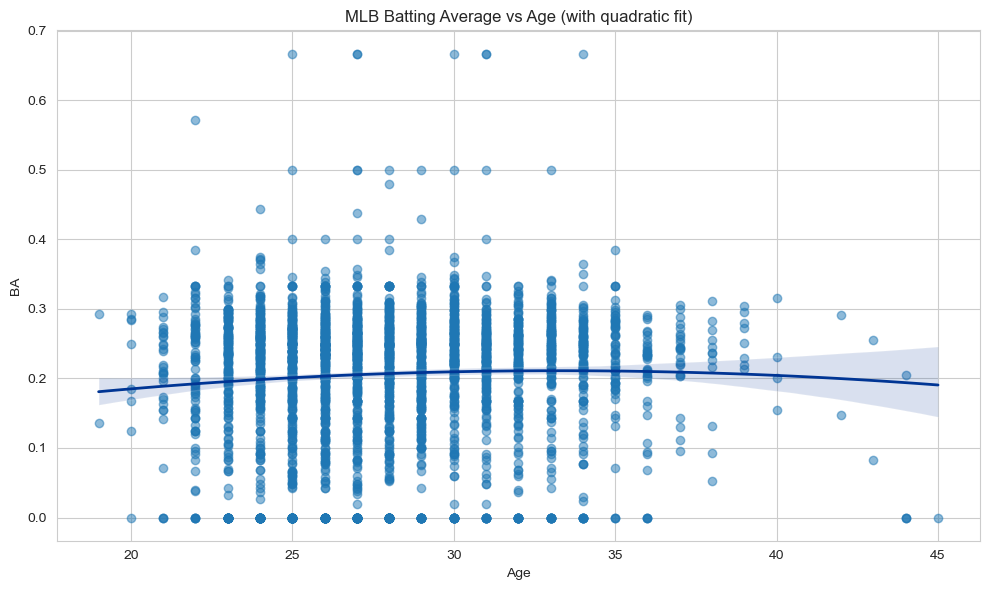

In [17]:
# Alternative using seaborn
fig, ax = plt.subplots(figsize=(10, 6))

# Scatter plot with regression line
sns.regplot(x='Age', y='BA', data=MLB16_18, order=2,
            scatter_kws={'alpha': 0.5},
            line_kws={'color': '#003594', 'linewidth': 2},
            ax=ax)

ax.set_title('MLB Batting Average vs Age (with quadratic fit)')
plt.tight_layout()
plt.show()

## Notebook Sequentiality

Any cell you run, it's as if you entered that into the Python interpreter. The notebook has a hidden implicit state.

* While the progression of a notebook is meant to be linear from top to bottom, you can run the cells in any order
* You need to make sure you understand which cells you've run and in which order

In [18]:
# Example of sequentiality
y = 4
x = 6
x + y

10

In [19]:
# If you run this after the above, x and y have new values
y = 10
x = 12
x + y

22

## Exporting Notebooks

If you're happy with your notebook, you can save it as a fixed output:
* Go to `File` > `Download as` and save it as HTML or PDF
* This will output the current state of the notebook, for whichever cells have been run

Note: if you have multiple notebooks open, the state in each notebook is separate.

## R vs Python: Quick Reference

| R | Python |
|---|--------|
| `library(tidyverse)` | `import pandas as pd` |
| `read_csv("file.csv")` | `pd.read_csv("file.csv")` |
| `head(df)` | `df.head()` |
| `colnames(df)` | `df.columns` |
| `summary(df)` | `df.describe()` |
| `str(df)` | `df.info()` |
| `lm(y ~ x, data=df)` | `sm.OLS(y, sm.add_constant(x)).fit()` |
| `coef(model)` | `model.params` |
| `summary(model)` | `model.summary()` |
| `getwd()` | `os.getcwd()` |
| `setwd(path)` | `os.chdir(path)` |

## Using the Shared Utils Module

For this course, we have a shared utility module `utils.py` that contains helpful functions for numerical methods, MLE, bootstrap, and more.

In [20]:
# Import the shared utilities (will be used in later notebooks)
import utils

# Set up Pitt-themed plotting style
utils.set_pitt_style()

# Quick summary statistics
utils.summary_stats(MLB16_18, columns=['Age', 'BA', 'AB'])

,count,mean,std,min,25%,50%,75%,max
Age,2895.0,28.034197,3.832337,19.0,25.000,28.00,31.000,45.000
BA,2895.0,0.204859,0.094858,0.0,0.163,0.23,0.265,0.667
AB,2895.0,185.782729,193.102538,3.0,24.000,100.00,330.000,672.000
